<a href="https://colab.research.google.com/github/rohanupadhye01/gold_price_prediction/blob/main/gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from google.colab import files
uploaded = files.upload()



Saving gld_price.csv to gld_price (1).csv


Importing Dataset

In [ ]:
import io
  
df = pd.read_csv(io.BytesIO(uploaded['gld_price.csv']))
print(df)



           Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]


In [ ]:
df.shape


(2290, 6)

In [ ]:
df.dtypes

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

In [ ]:
df.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation

In [ ]:
correlation=df.corr()
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


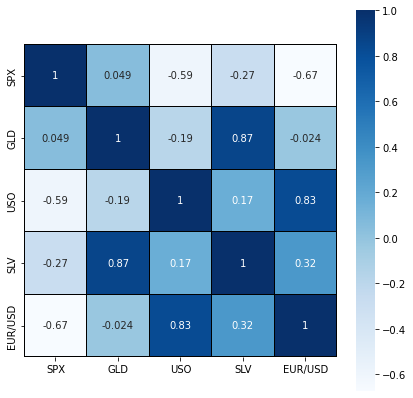

In [ ]:
plt.figure(figsize = (7,7))
sns.heatmap(correlation, square='True', cbar=True, annot=True, linewidths='0.2', linecolor='black', cmap='Blues')

In [ ]:
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


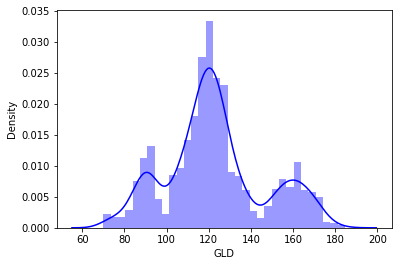

In [ ]:
sns.distplot(df['GLD'],color='b')

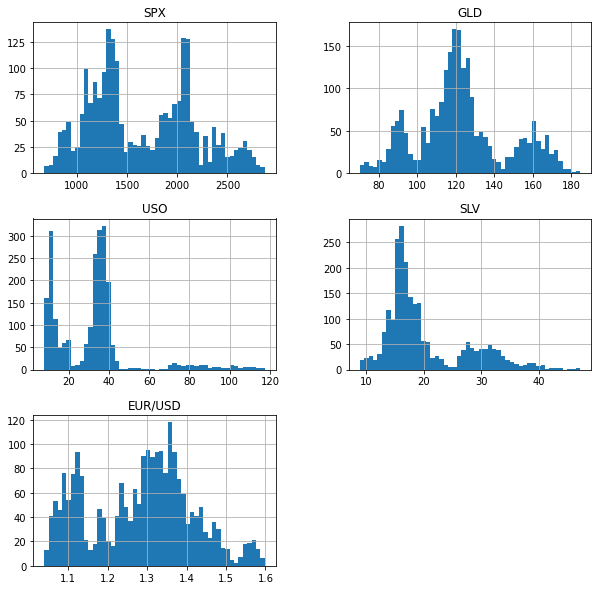

In [ ]:
df.hist(figsize=(10,10),bins=50)
plt.show()

In [ ]:
x = df.drop(['Date','GLD'],axis=1)
y = df['GLD']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [ ]:
regressor.fit(x_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
error_score = metrics.r2_score(y_test, y_pred)
print("R squared error : ", error_score)
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred))


R squared error :  0.9874416877430625
MAE :   1.382048407183407


Text(0.5, 1.0, 'Actual vs Predicted Price')

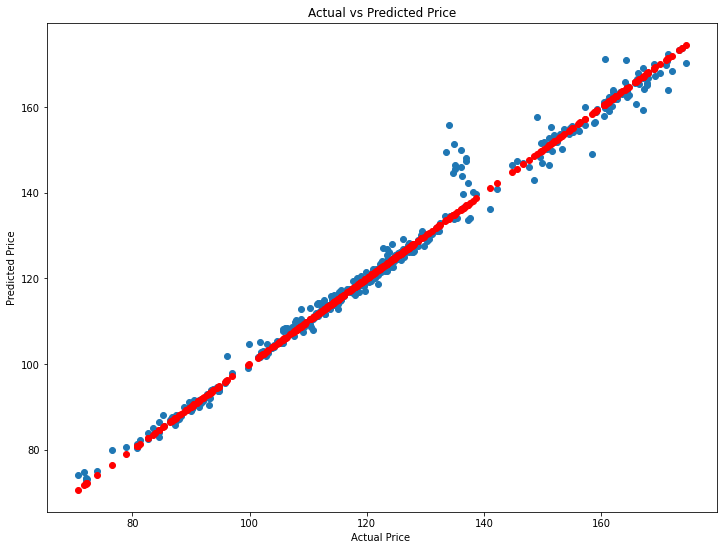

In [ ]:
fig=plt.figure(figsize=(12,9))
plt.scatter(y=y_pred,x=y_test)
plt.scatter(y_test,y_test,color='r',linewidths=1)
plt.xlabel('Actual Price ')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')

Test Case

In [ ]:
input_data = x[10:11]
input_data_arr= np.asarray(input_data)
input_data_arr_reshape = input_data_arr.reshape(1, -1)
print(input_data_arr_reshape)

[[1373.199951   71.849998   15.654       1.466405]]


In [ ]:
prediction = regressor.predict(input_data_arr_reshape)
print(prediction)

[86.9220982]


In [ ]:
print(y[10:11])

10    86.699997
Name: GLD, dtype: float64
